In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
with np.load("/home/mohan/Downloads/drive_times_1024B.npz") as f:
    t1=f['times']
    bs1=1024
with np.load("/home/mohan/Downloads/drive_times_1048576B.npz") as f:
    t2=f['times']
    bs2=1048576

with np.load("/home/mohan/Downloads/drive_times_1048576B_nobuffer.npz") as f:
    t3=f['times']
    bs3=1048576

with np.load("/home/mohan/Downloads/drive_times_1024B_1Mbuffer.npz") as f:
    t4=f['times']
    bs4=1024


In [3]:
MB=1024*1024

Text(0.5, 1.0, 'speed to packet size/packet time')

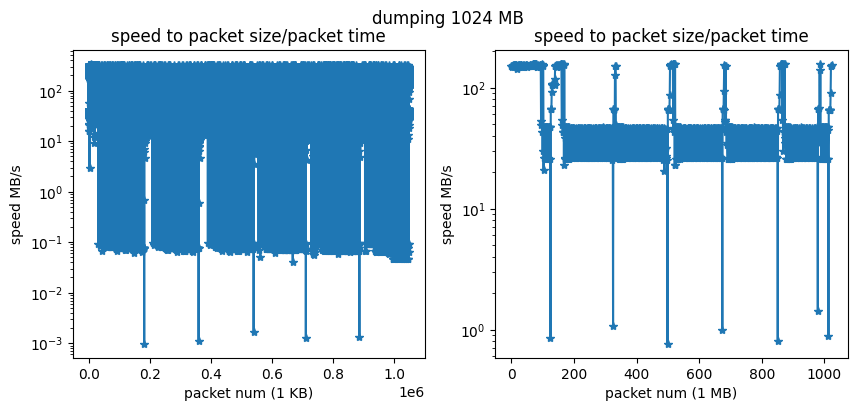

In [10]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.suptitle("dumping 1024 MB")
plt.subplot(121)
plt.semilogy(t1,"*-")
plt.xlabel("packet num (1 KB)")
plt.ylabel("speed MB/s")
plt.title("speed to packet size/packet time")

plt.subplot(122)
plt.semilogy(t2,"*-")
plt.xlabel("packet num (1 MB)")
plt.ylabel("speed MB/s")
plt.title("speed to packet size/packet time")

Text(0.5, 1.0, 'time to write packet')

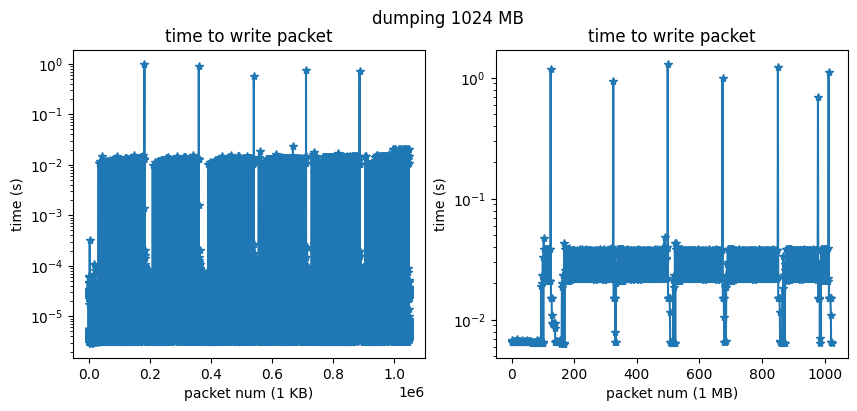

In [14]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.suptitle("dumping 1024 MB")
plt.subplot(121)
plt.semilogy(t1,"*-")
plt.xlabel("packet num (1 KB)")
plt.ylabel("time (s)")
plt.title("time to write packet")

plt.subplot(122)
plt.semilogy(t2,"*-")
plt.xlabel("packet num (1 MB)")
plt.ylabel("time (s)")
plt.title("time to write packet")

In [12]:
np.diff(np.where(bs2/t2/MB < 10))

array([[200, 174, 175, 177, 128,  34]])

Text(0.5, 1.0, 'zoom-in 1 KB packets')

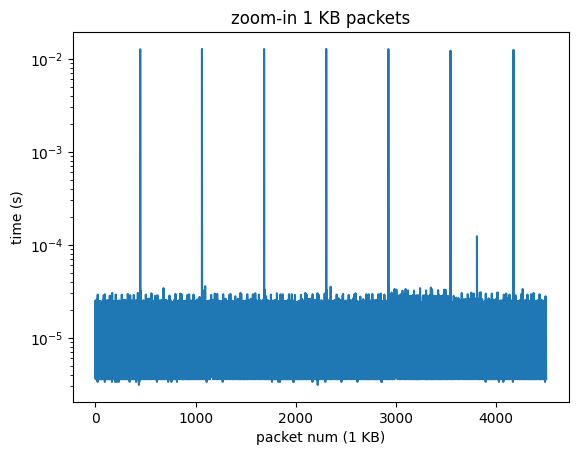

In [46]:
plt.semilogy(t1[150000:154500])
plt.ylabel("time (s)")
plt.xlabel("packet num (1 KB)")
plt.title("zoom-in 1 KB packets")

In [48]:
print(np.where(t1[150000:154500]>1e-3))
print(np.diff(np.where(t1[150000:154500]>1e-3)[0]))

(array([ 448, 1064, 1684, 2304, 2924, 3544, 4172]),)
[616 620 620 620 620 628]


620 kB between the smaller peaks. This might be transferring from user space to kernel space.

In [54]:
4096 * 2048 / (1024*1024) # 8 MB

8.0

Text(200, 0.17, 'avg speed = 1/avg time =  13.470 MB/s')

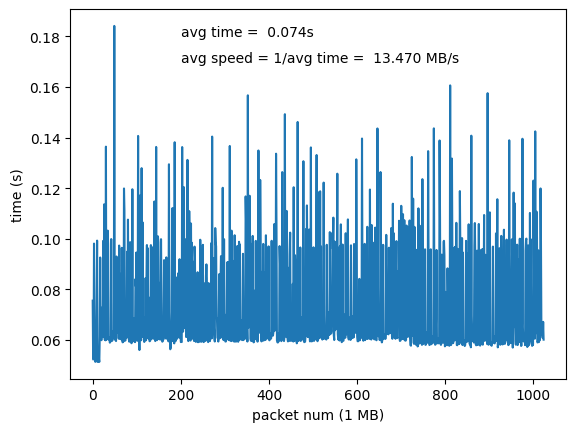

In [41]:
plt.plot(t3)
plt.xlabel("packet num (1 MB)")
plt.ylabel("time (s)")
plt.text(200,0.18,f"avg time = {np.mean(t3) : 5.3f}s")
plt.text(200,0.17,f"avg speed = 1/avg time = {1/np.mean(t3) : 5.3f} MB/s")

Text(0.5, 1.0, 'zoom-out large scale big peaks')

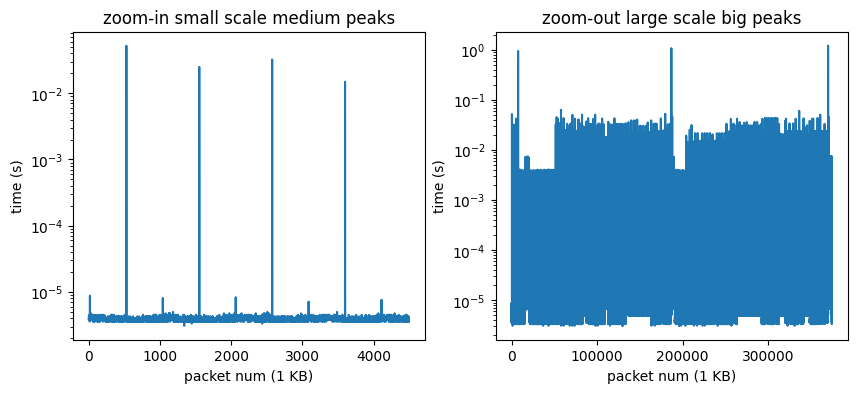

In [72]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.semilogy(t4[150000:154500])
plt.ylabel("time (s)")
plt.xlabel("packet num (1 KB)")
plt.title("zoom-in small scale medium peaks")
plt.subplot(122)
plt.semilogy(t4[150000:524500])
plt.ylabel("time (s)")
plt.xlabel("packet num (1 KB)")
plt.title("zoom-out large scale big peaks")

In [75]:
t4[np.where(t4[150000:154500]>1e-3)[0]+150000]

array([0.05206561, 0.02492237, 0.0322206 , 0.01485825])

In [76]:
1/0.01

100.0

In [58]:

print(np.diff(np.where(t4[150000:154500]>1e-3)[0]))

[1024 1024 1024]


peaks are spaced 1024 KB apart. so this is the time taken from moving data from user-space to kernel space.

In [79]:
print(np.diff(np.where(t4[150000:524500]>1e-1)[0]))


[179200 183296]


In [83]:
t4[186896+150000]

1.0787286758422852

around 180-200 MB/s